In [77]:
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_curve,auc, precision_recall_curve
path = os.getcwd()

read from CSV


In [2]:
def read_file(file_name):
    data = pd.read_csv(path+'/03-digits-dataset/'+file_name)
    y=data[data.columns[0]].as_matrix()
    x=data.drop(data.columns[[0]], axis=1).as_matrix()
    return  x,y

In [3]:
train_x, train_y = read_file("train.csv")

In [4]:
#Test Data
test_x = pd.read_csv(path + '/03-digits-dataset/test.csv').as_matrix()

In [5]:
test_y=pd.read_csv(path + '/03-digits-dataset/out.csv')
test_y=test_y[test_y.columns[1]]

In [6]:
def display_digit(x, y):
    pixels = x.reshape((28, 28))
    label = y
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

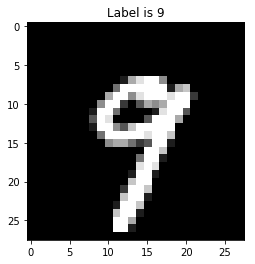

In [7]:
index=232
display_digit(test_x[index],test_y[index])

Dimensionality Reduction: apply PCA to both the training and testing images to reduce
their dimensionality while preserving a given percentage (e.g. 80 %) of the variance of the
dataset. In Python you may use the sklearn functionality: from sklearn.decomposition
import PCA.

In [8]:
def pca_dim_reduction(X, X_test, desired_var):
    # Check how many principle components needed for desired variance
    pca = PCA()
    pca.fit(X)
    reached_var = 0 
    for v in range(len(pca.explained_variance_ratio_)):
        reached_var = reached_var + pca.explained_variance_ratio_[v]
        if reached_var >= desired_var:
            break
    # PCA with desired number ov principle components
    pca2 = PCA(n_components=v+1)
    X = pca2.fit_transform(X)
    X_test = pca2.transform(X_test)
    print('*** PCA: reached variance: %2.4f, Numb. Dim.: %2.0f ***' % (reached_var, v+1))
    return X,X_test, reached_var, v+1

In [9]:
train_x.shape

(42000, 784)

In [10]:
pca_train_x,pca_test_x,reached,v =  pca_dim_reduction(train_x,test_x,0.8)

*** PCA: reached variance: 0.8003, Numb. Dim.: 43 ***


In [11]:
def binary_dataset(digit, y):
    y_new=y.copy()
    y_new[y_new != digit] = 0
    y_new[y_new == digit] = 1
    return y_new

In [12]:
test_y_2=binary_dataset(3,test_y)

Binary classification: redefine the problem as a binary classification task. Write a function
that receives the chosen digit to classify as input and returns the corresponding binary training
labels (E.g. use the function to choose digit 5, then all of the 5s in the training set will
get label 1 while the remaining of the digits will get label 0).

In [13]:
def get_performance(labels, predicted_labels):
    cm = confusion_matrix(labels, predicted_labels)
    tn = float(cm[1][1]) / np.sum(cm[1])

    dict = {
        "accuracy": accuracy_score(labels, predicted_labels),
        "recall": recall_score(labels, predicted_labels),
        "precision": precision_score(labels, predicted_labels),
        "FPR": 1 - tn

    }
    return dict

In [14]:
train_y_2=binary_dataset(2,train_y)

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y_2, test_size=0.15, random_state=42)

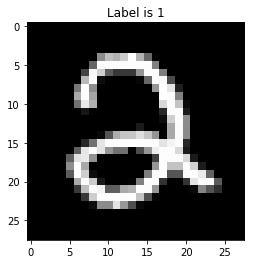

In [15]:
index=2
display_digit(X_train[index],y_train[index])

Hyper-parameter analysis: Use the train and validation sets to compute the performance
of different SVM models. Consider both a linear and a RBF kernel and change
the values of the hyper-parameter C as in the first exercise, as well as the sigma parameter
of the RBF kernel. For each case model the following performance measures:
accuracy, recall, FPR and precision.

In [108]:
h = .02  # step size in the mesh
def compare(names, classifiers, datasets,testsize=.4):
    perfomance = []
    recall = []
    precision = []  
    fpr = []    
    tpr = []
     
    figure = plt.figure(figsize=(27, 9))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=testsize, random_state=42)

    
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            

    
            predicted=clf.predict(X_test)
            
            performance_metric=get_performance(y_test,predicted);
            perfomance.append(performance_metric)

            
            #calcuate ROC
            prob=clf.predict_proba(X_test)
            proboo=prob[:,0]
            t=y_test.ravel()
            fpr_v, tpr_v, _ = roc_curve(t,proboo)
            fpr.append(fpr_v)
            tpr.append(tpr_v)

            
            #calcualte RF
            precision_v, recall_v, _ = precision_recall_curve(t,proboo)
            precision.append(precision_v)
            recall.append(recall_v)


            print("score is ",score)


            i += 1
        return perfomance, fpr,tpr,recall,precision


In [117]:
#defining a dictionary of classifier
kernels = {'linear', 'rbf'}
cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
# cs = {0.001}
names = ["Linear"]

classifiers = [svm.SVC(kernel="linear",probability=True, C=1)]

for c in cs:
    classifiers.append(svm.SVC(kernel="rbf",probability=True, C=c))
    names.append("RBF C="+str(c))


train_y_5=binary_dataset(5,train_y)
test_y_5=binary_dataset(5,test_y)

# digit5_train, digit5_test, digit5_train, digit5_test = train_test_split(train_x, train_y_5, test_size=0.15, random_state=42)

# data_digit_5 = (pca_train_x,train_y_5,pca_test_x,test_y_5)

data_digit_5 = (pca_train_x,train_y_5)

type(data_digit_5)
datasets = [data_digit_5]
#        return perfomance, fpr,tpr,recall,precision

perfomance, fpr,tpr,recall,precision=compare(names, classifiers, datasets,.8)



score is  0.961220238095


/Users/xtarx/anaconda/envs/tensorflow_py_3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


score is  0.910029761905
score is  0.910029761905
score is  0.954494047619
score is  0.990714285714
score is  0.991875
score is  0.992053571429
score is  0.992053571429
score is  0.992053571429


In [121]:
len(fpr)

9

In [119]:
train_x.shape

(42000, 784)

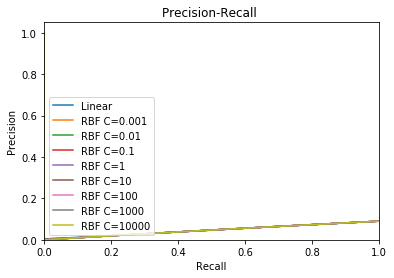

In [131]:
# Plot Precision-Recall curve
plt.clf()

for i in range(len(perfomance)):

    plt.plot(recall[i], precision[i],
         label=names[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall ')
plt.legend(loc="lower left")
plt.show()


ROC AUC: 0.06


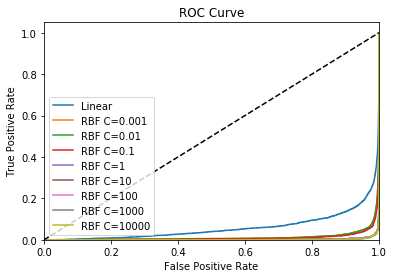

In [130]:



i=0

# Calculate the AUC
roc_auc = auc(fpr[i], tpr[i])
print ('ROC AUC: %0.2f' % roc_auc)
            
# Plot of a ROC curve for a specific class
#    plt.plot(fpr[i], tpr[i], label= names[i]+' (area = %0.2f)' % roc_auc)
for i in range(len(perfomance)):
    plt.plot(fpr[i], tpr[i], label= names[i])
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower left")
plt.show()    